In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

C:\Users\Suzan\AppData\Local\Temp\ipykernel_16504\42730451.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
OTTO = pd.read_excel(r'C:\Users\Suzan\Desktop\sem 3\datasets\data\AtlantaAirlineData.xlsx',)

In [3]:
OTTO.head()

,"Delta Airline Flight Statistics, Atlanta Hartsfield International (ATL) December 24, 2009",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Flight Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Time Difference (Minutes),Taxi-in Time (Minutes)
2,8,IAH,19:04,19:19,15,14
3,16,LAX,15:10,15:04,-6,6
4,22,MSY,16:33,16:24,-9,11


In [4]:
OTTO = pd.read_excel(r'C:\Users\Suzan\Desktop\sem 3\datasets\data\AtlantaAirlineData.xlsx',skiprows=2)

In [5]:
OTTO.head()

,Flight Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Time Difference (Minutes),Taxi-in Time (Minutes)
0,8,IAH,19:04,19:19,15,14
1,16,LAX,15:10,15:04,-6,6
2,22,MSY,16:33,16:24,-9,11
3,24,LAS,14:33,14:27,-6,9
4,28,MCO,14:10,14:15,5,13


In [6]:
OTTO.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
327    False
328    False
329    False
330    False
331    False
Length: 332, dtype: bool

In [7]:
OTTO.isnull()

,Flight Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Time Difference (Minutes),Taxi-in Time (Minutes)
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
327,False,False,False,False,False,False
328,False,False,False,False,False,False
329,False,False,False,False,False,False
330,False,False,False,False,False,False


In [8]:
OTTO.isnull().sum()

Flight Number                          0
Origin Airport                         0
Scheduled Arrival Time                 0
Actual Arrival Time                    0
Time Difference (Minutes)              0
Taxi-in Time (Minutes)                 0
dtype: int64

In [9]:
OTTO.shape

(332, 6)

Checking the data type

In [10]:
OTTO.dtypes

Flight Number                          object
Origin Airport                         object
Scheduled Arrival Time                 object
Actual Arrival Time                    object
Time Difference (Minutes)              object
Taxi-in Time (Minutes)                 object
dtype: object

Attempt to convert columns to numeric, identifying any issues  incase of any other  values ie text or non numeric data

In [11]:
cols_to_convert = ['Time Difference (Minutes)', 'Taxi-in Time (Minutes)']

for col in cols_to_convert:
    OTTO[col] = pd.to_numeric(OTTO[col], errors='coerce')

Check if conversion introduced any NaN values (indicating non-numeric values that couldn't be converted)

In [12]:
OTTO.isnull().sum(), OTTO.head()

(Flight Number                          0
 Origin Airport                         0
 Scheduled Arrival Time                 0
 Actual Arrival Time                    0
 Time Difference (Minutes)              1
 Taxi-in Time (Minutes)                 1
 dtype: int64,
   Flight Number Origin Airport  Scheduled Arrival Time               \
 0             8             IAH                               19:04   
 1            16             LAX                               15:10   
 2            22             MSY                               16:33   
 3            24             LAS                               14:33   
 4            28             MCO                               14:10   
 
   Actual Arrival Time               Time Difference (Minutes)  \
 0                            19:19                       15.0   
 1                            15:04                       -6.0   
 2                            16:24                       -9.0   
 3                            14:27

Replace missing values

For "Time Difference (Minutes)", using mean

In [13]:
OTTO['Time Difference (Minutes)'].fillna(OTTO['Time Difference (Minutes)'].mean(), inplace=True)

C:\Users\Suzan\AppData\Local\Temp\ipykernel_16504\3670132839.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  OTTO['Time Difference (Minutes)'].fillna(OTTO['Time Difference (Minutes)'].mean(), inplace=True)


For "Taxi-in Time (Minutes)", using mode


In [14]:
OTTO['Taxi-in Time (Minutes)'].fillna(OTTO['Taxi-in Time (Minutes)'].mode()[0], inplace=True)

C:\Users\Suzan\AppData\Local\Temp\ipykernel_16504\2510380326.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  OTTO['Taxi-in Time (Minutes)'].fillna(OTTO['Taxi-in Time (Minutes)'].mode()[0], inplace=True)


Calculate measures of central tendency for the numeric columns

In [15]:
central_tendencies = {
    'Mean Time Difference': OTTO['Time Difference (Minutes)'].mean(),
    'Median Time Difference': OTTO['Time Difference (Minutes)'].median(),
    'Mode Time Difference': OTTO['Time Difference (Minutes)'].mode()[0],
    '25th Percentile Time Difference': OTTO['Time Difference (Minutes)'].quantile(0.25),
    '50th Percentile Time Difference': OTTO['Time Difference (Minutes)'].quantile(0.50),
    '75th Percentile Time Difference': OTTO['Time Difference (Minutes)'].quantile(0.75),
    'Mean Taxi-in Time': OTTO['Taxi-in Time (Minutes)'].mean(),
    'Median Taxi-in Time': OTTO['Taxi-in Time (Minutes)'].median(),
    'Mode Taxi-in Time':OTTO['Taxi-in Time (Minutes)'].mode()[0],
    '25th Percentile Taxi-in Time': OTTO['Taxi-in Time (Minutes)'].quantile(0.25),
    '50th Percentile Taxi-in Time': OTTO['Taxi-in Time (Minutes)'].quantile(0.50),
    '75th Percentile Taxi-in Time': OTTO['Taxi-in Time (Minutes)'].quantile(0.75),
}
central_tendencies

{'Mean Time Difference': 4.918429003021148,
 'Median Time Difference': -3.0,
 'Mode Time Difference': -9.0,
 '25th Percentile Time Difference': -12.0,
 '50th Percentile Time Difference': -3.0,
 '75th Percentile Time Difference': 8.0,
 'Mean Taxi-in Time': 11.596385542168674,
 'Median Taxi-in Time': 10.0,
 'Mode Taxi-in Time': 9.0,
 '25th Percentile Taxi-in Time': 8.0,
 '50th Percentile Taxi-in Time': 10.0,
 '75th Percentile Taxi-in Time': 13.0}

Insert a new column "Product" based on the product of "Time Difference (Minutes)" and "Taxi-in Time (Minutes)"

In [16]:
OTTO['Product'] = OTTO['Time Difference (Minutes)'] * OTTO['Taxi-in Time (Minutes)']

Display the first few rows to verify the new column


In [17]:
OTTO.head()

,Flight Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Time Difference (Minutes),Taxi-in Time (Minutes),Product
0,8,IAH,19:04,19:19,15.0,14.0,210.0
1,16,LAX,15:10,15:04,-6.0,6.0,-36.0
2,22,MSY,16:33,16:24,-9.0,11.0,-99.0
3,24,LAS,14:33,14:27,-6.0,9.0,-54.0
4,28,MCO,14:10,14:15,5.0,13.0,65.0


Including the "Product" column in the corrected column names


In [18]:
corrected_columns = ['Flight Number', 'Origin Airport', 'Scheduled Arrival Time', 'Actual Arrival Time', 
                     'Time Difference (Minutes)', 'Taxi-in Time (Minutes)', 'Product']


Update column names to ensure consistency


In [19]:
OTTO.columns = corrected_columns

the multivariate analysis with corrected column names


In [20]:
airport_grouped_corrected =   OTTO.groupby('Origin Airport').agg({
    'Time Difference (Minutes)': 'mean',
    'Taxi-in Time (Minutes)': 'mean'
}).reset_index()

In [21]:
OTTO.head()

,Flight Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Time Difference (Minutes),Taxi-in Time (Minutes),Product
0,8,IAH,19:04,19:19,15.0,14.0,210.0
1,16,LAX,15:10,15:04,-6.0,6.0,-36.0
2,22,MSY,16:33,16:24,-9.0,11.0,-99.0
3,24,LAS,14:33,14:27,-6.0,9.0,-54.0
4,28,MCO,14:10,14:15,5.0,13.0,65.0


Recalculate correlation with corrected column names

In [22]:
correlation_corrected = OTTO[['Time Difference (Minutes)', 'Taxi-in Time (Minutes)']].corr()

correlation_corrected, airport_grouped_corrected.head()

(                           Time Difference (Minutes)  Taxi-in Time (Minutes)
 Time Difference (Minutes)                   1.000000                0.023799
 Taxi-in Time (Minutes)                      0.023799                1.000000,
   Origin Airport  Time Difference (Minutes)  Taxi-in Time (Minutes)
 0                                  4.918429                9.000000
 1            ABQ                   4.000000                7.666667
 2            AUS                   7.500000               15.000000
 3            BDL                 -18.600000               10.200000
 4            BHM                  19.000000               30.000000)

From the multivariate analysis focusing on the first few "Origin Airports", here are some observations:

The average "Time Difference (Minutes)" varies significantly by airport, with some airports showing a tendency for earlier arrivals (negative values) and others for delays (positive values). For instance, BDL (Bradley International Airport) shows a notable average early arrival time of -18.6 minutes, whereas BHM (Birmingham-Shuttlesworth International Airport) shows a significant delay with an average time difference of 19 minutes.
The "Taxi-in Time (Minutes)" also varies, with BHM showing a particularly high average of 30 minutes.

Univariate analysis refers to analyzing one variable in a dataset

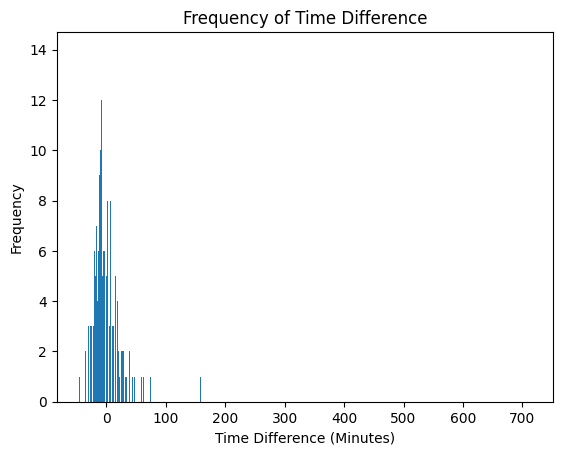

In [23]:
Time_frequency = OTTO['Time Difference (Minutes)'].value_counts()

plt.bar(Time_frequency.index, Time_frequency.values)  # Fixing 'Time_frequency' to 'Time_frequency.values'
plt.title('Frequency of Time Difference')
plt.xlabel('Time Difference (Minutes)')
plt.ylabel('Frequency')
plt.show()

 Bivarient Analysis
 This is used for annalyzing  only two  variables. 

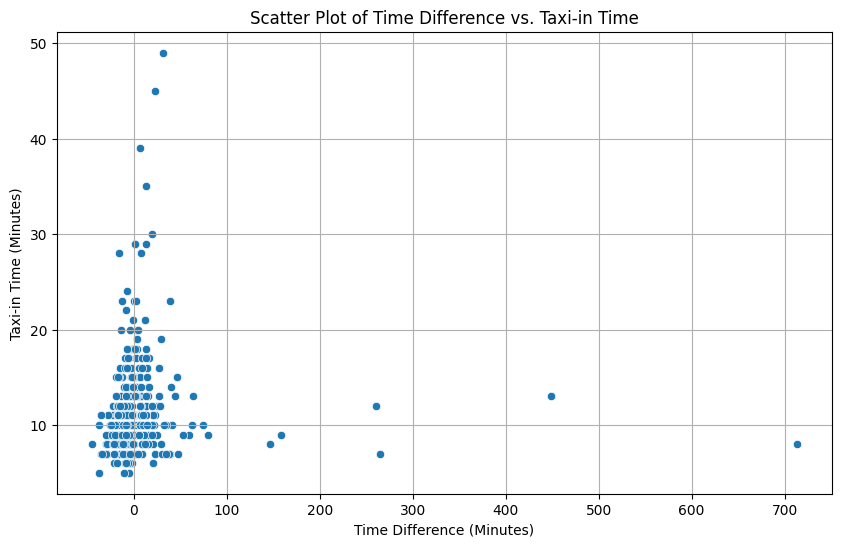

In [24]:


# Bivariate Analysis Graph: Scatter plot of "Time Difference (Minutes)" vs. "Taxi-in Time (Minutes)"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time Difference (Minutes)', y='Taxi-in Time (Minutes)', data=OTTO)
plt.title('Scatter Plot of Time Difference vs. Taxi-in Time')
plt.xlabel('Time Difference (Minutes)')
plt.ylabel('Taxi-in Time (Minutes)')
plt.grid(True)
plt.show()

the scatter plot is showing the relationship between two variables: "Time Difference (Minutes)" on the x-axis and "Taxi-in Time (Minutes)" on the y-axis. Each point on the scatter plot represents a single observation in the dataset.

Looking at the plot, the "Time Difference" seems to be the amount of time between two events or two states (though it's not clear from the context what these are), while "Taxi-in Time" is likely the time an airplane spends taxiing in after landing until it arrives at the gate (a common use of this term in aviation).

The majority of data points are clustered at the lower end of both axes, indicating that for most observations, both the "Time Difference" and "Taxi-in Time" are relatively low (in minutes). There are a few points spread out to the right, which suggest that there are some instances where the "Time Difference" is significantly higher, but these do not seem to show a clear correlation with the "Taxi-in Time", which remains mostly low or moderate, even when the "Time Difference" increases. This could indicate that even when there is a larger time difference for some reason, it does not necessarily affect the taxi-in time.

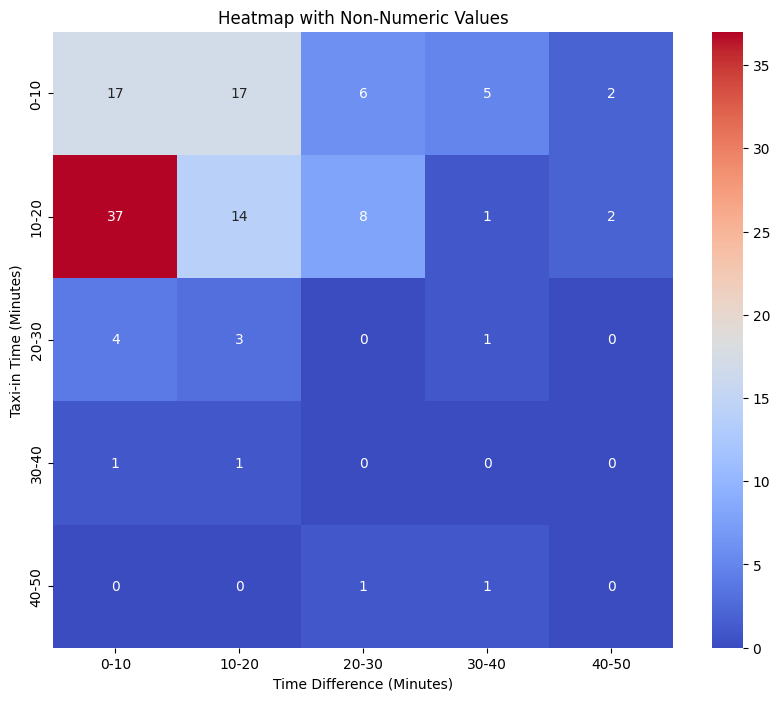

In [25]:

bins = [0, 10, 20, 30, 40, 50] 
labels = ['0-10', '10-20', '20-30', '30-40', '40-50']  
OTTO['Taxi-in Time (Minutes)'] = pd.cut(OTTO['Taxi-in Time (Minutes)'], bins=bins, labels=labels)
OTTO['Time Difference (Minutes)'] = pd.cut(OTTO['Time Difference (Minutes)'], bins=bins, labels=labels)


plt.figure(figsize=(10, 8))
sns.heatmap(pd.crosstab(OTTO['Taxi-in Time (Minutes)'], OTTO['Time Difference (Minutes)']), cmap="coolwarm", annot=True, fmt="d")
plt.title('Heatmap with Non-Numeric Values')
plt.xlabel('Time Difference (Minutes)')
plt.ylabel('Taxi-in Time (Minutes)')
plt.show()

 the code takes two numerical columns, 'Taxi-in Time (Minutes)' and 'Time Difference (Minutes)', bins the values into discrete intervals, and then creates a heatmap showing the frequency of occurrences for each combination of bin pairs. This visualization helps in understanding the distribution and relationship between the two variables.



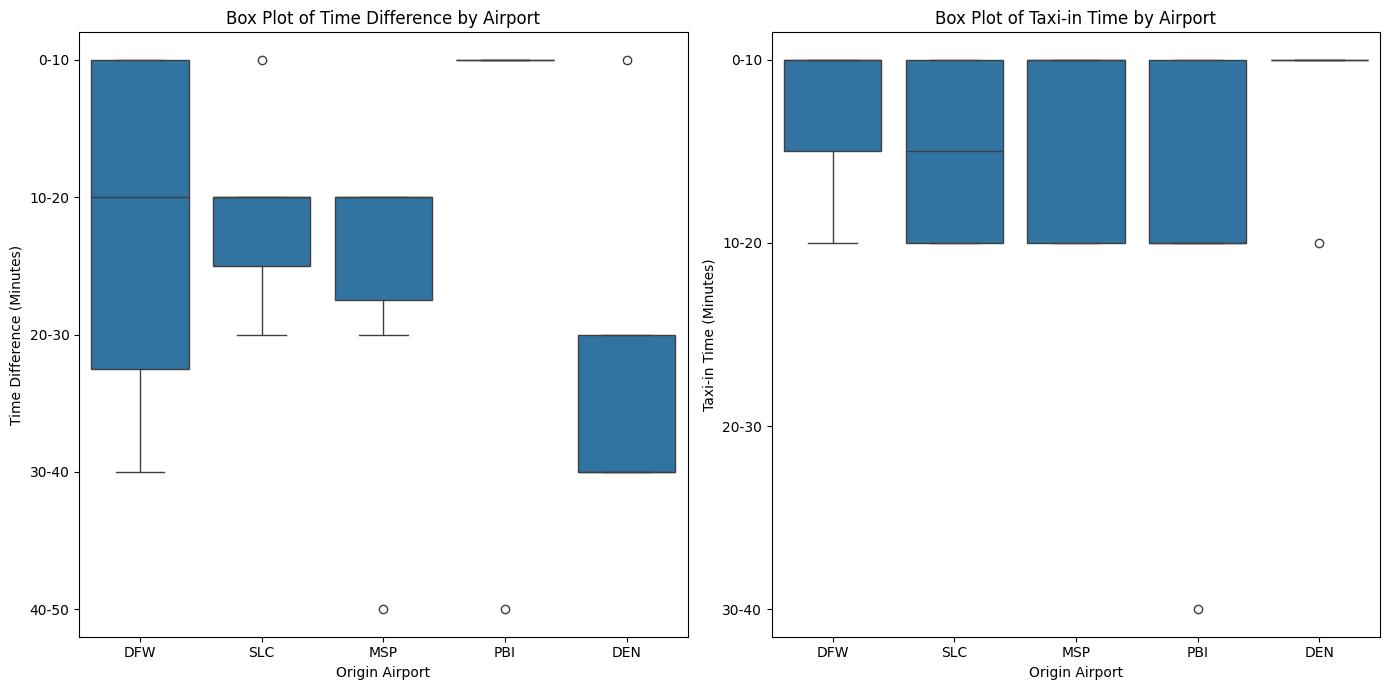

In [26]:
top_airports = OTTO.groupby('Origin Airport')['Time Difference (Minutes)'].count().nlargest(5).index

# Filtering data to include only these airports
filtered_data = OTTO[OTTO['Origin Airport'].isin(top_airports)]

plt.figure(figsize=(14, 7))

# Boxplot for "Time Difference (Minutes)"
plt.subplot(1, 2, 1)
sns.boxplot(x='Origin Airport', y='Time Difference (Minutes)', data=filtered_data)
plt.title('Box Plot of Time Difference by Airport')
plt.xlabel('Origin Airport')
plt.ylabel('Time Difference (Minutes)')

# Boxplot for "Taxi-in Time (Minutes)"
plt.subplot(1, 2, 2)
sns.boxplot(x='Origin Airport', y='Taxi-in Time (Minutes)', data=filtered_data)
plt.title('Box Plot of Taxi-in Time by Airport')
plt.xlabel('Origin Airport')
plt.ylabel('Taxi-in Time (Minutes)')

plt.tight_layout() 
plt.show()


Multivarient Analysis 
 this is used for analyzing more than 2 varriables 

Time Difference Box Plot: 

This visualization shows the range of time differences (delays or early arrivals) for flights from the selected airports. The spread and median of time differences vary significantly across airports, indicating that some airports are more prone to delays or early arrivals than others. The presence of outliers in some airports suggests that extreme delays or early arrivals occur, though they are not the norm.



Taxi-in Time Box Plot: 

Similar to the time differences, the taxi-in times also vary across airports. Some airports have longer median taxi-in times and wider interquartile ranges, suggesting variability in how long it takes for an aircraft to taxi to the gate after landing. This could be influenced by airport layout, traffic congestion, and operational efficiencies.

In [27]:
OTTO.columns

Index(['Flight Number', 'Origin Airport', 'Scheduled Arrival Time',
       'Actual Arrival Time', 'Time Difference (Minutes)',
       'Taxi-in Time (Minutes)', 'Product'],
      dtype='object')

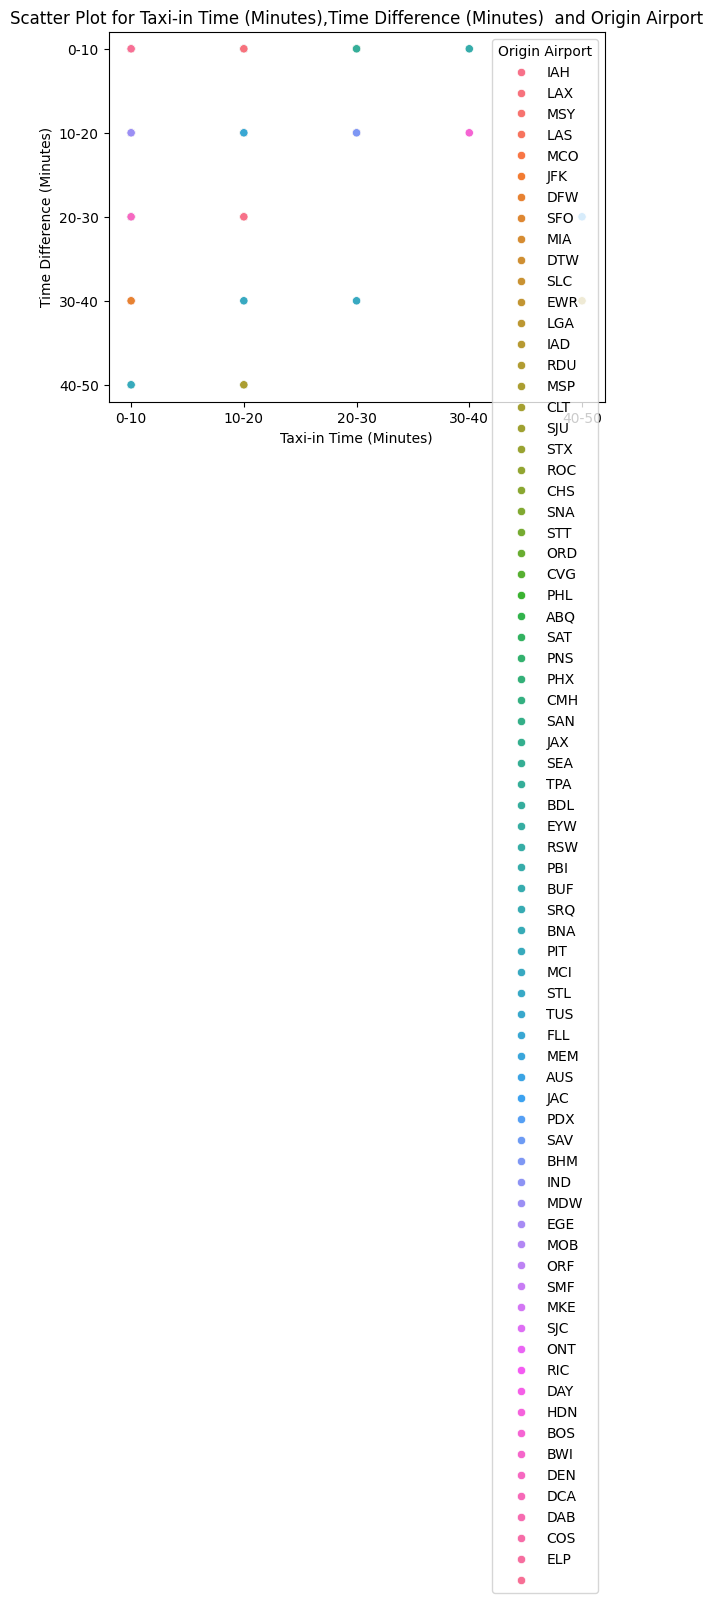

In [28]:

sns.scatterplot(x='Taxi-in Time (Minutes)', y='Time Difference (Minutes)', hue='Origin Airport', data=OTTO)
plt.title('Scatter Plot for Taxi-in Time (Minutes),Time Difference (Minutes)  and Origin Airport')
plt.show()


 the scatter plot visualizes the relationship between "Taxi-in Time (Minutes)" and "Time Difference (Minutes)" while considering the categorical variable "Origin Airport". It helps in understanding how the taxi-in time and time difference vary across different airports, providing insights into potential patterns or differences between them.



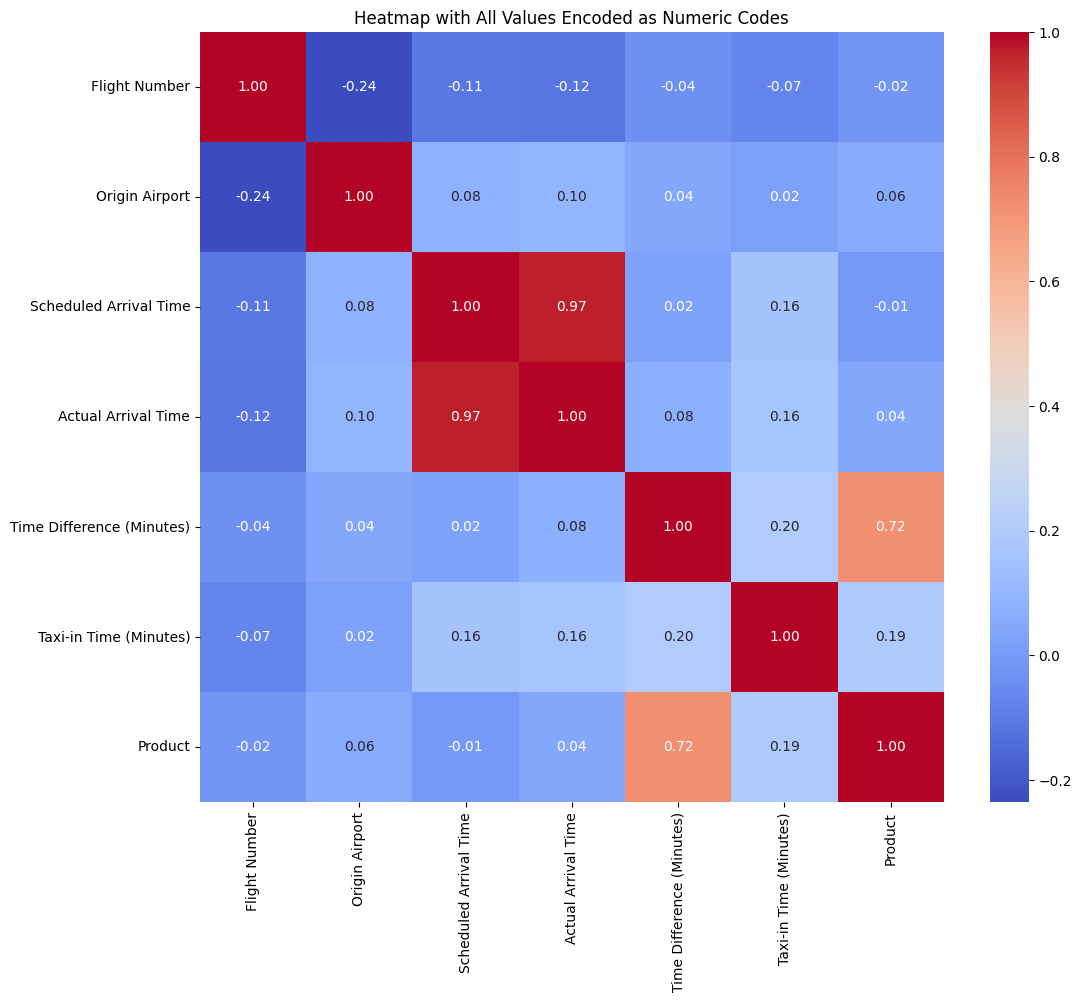

In [29]:




import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming OTTO is your DataFrame containing the data

# Encode all values with numeric codes
OTTO_encoded = OTTO.apply(lambda x: pd.Categorical(x).codes)

# Now, create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(OTTO_encoded.corr(), cmap="coolwarm", annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title('Heatmap with All Values Encoded as Numeric Codes')
plt.show()


the code encodes all values in the DataFrame OTTO as numeric codes and then creates a heatmap showing the correlation between these encoded values. This allows for visualizing relationships between variables, including both numeric and non-numeric ones.